we have 2 ways to handle the missing values:-
1. Remove the complete row (complete case analysis)
2. Impute them
2.1 Simple imputer (univariate- mean, median, mode, end of distribution..)
2.2. Multivariate imputation ( KNN, Iterative imputation)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_science_job.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [6]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [8]:
df.shape

(19158, 13)

In [14]:
# getting the name of the columns having less than 5% missing values.
cols = []
for var in df.columns:
    if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0:
        cols.append(var)
# in one line:
# cols = [ var for var in df.columns if df[var].isnull().mean() <0.05 ]

In [15]:
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [16]:
# checking % of remaining rows after we remove those rows.
len(df[cols].dropna())/len(df)

0.8968577095730244

In [17]:
# so finally dropping those missing rows.
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

### The distribution should not change after removing the missing values

In [19]:
## so let's once compare the distribution before and after the change.

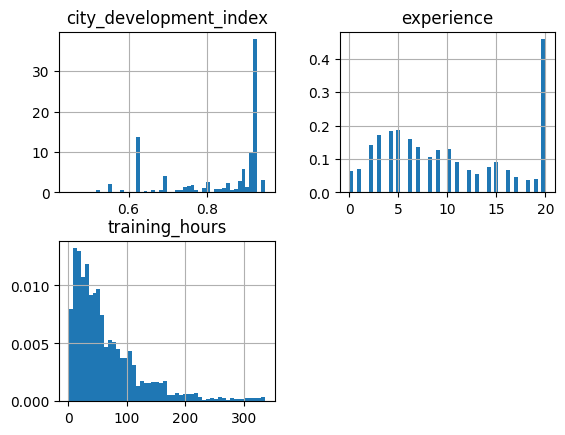

In [27]:
new_df.hist(bins=50, density=True)
plt.show()

<Axes: >

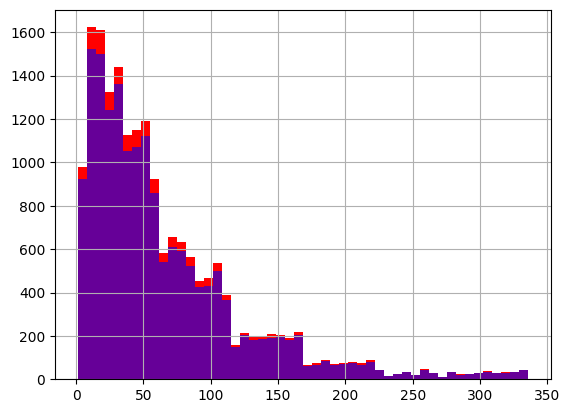

In [44]:
df['training_hours'].hist(bins=50 ,color='red')
# alpha makes the color transparent, so we can see the overlapping parts.
new_df['training_hours'].hist(bins=50,color='blue', alpha = 0.6)

<Axes: ylabel='Density'>

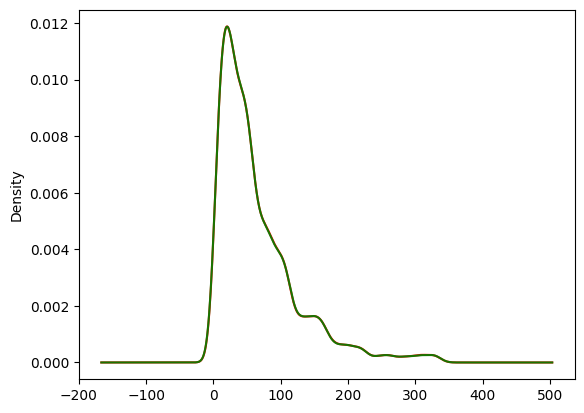

In [49]:
# checking the density plot
df['training_hours'].plot.density(color='red')
new_df['training_hours'].plot.density(color='green')
# distribution didn't change.

In [50]:
# thus we can say that the data was missing but completly at random.

### for categorical columns, their ratio must be same before and after the change.

In [51]:
new_df.head()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0


In [52]:
new_df['enrolled_university'].value_counts()

enrolled_university
no_enrollment       12632
Full time course     3449
Part time course     1101
Name: count, dtype: int64

In [57]:
temp = pd.concat( [ df['enrolled_university'].value_counts()/len(df), 
                   new_df['enrolled_university'].value_counts()/len(new_df)], axis =1)
# adding column names.
temp.columns = ['original', 'cca']
temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [ ]:
# we see that the ratio are almost same 

In [61]:
t1 = new_df['education_level'].value_counts()/len(new_df)
t2 = df['education_level'].value_counts()/len(df)

In [73]:
temp2 = pd.concat([t2, t1], axis = 1) # concating side by side.
temp2.columns = ['original', 'cca']
temp2

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


In [74]:
# almost same ratio, so missing completely at random wala case hai.

# Part 2.

### handling missing values: numerical data

In [75]:
df = pd.read_csv('titanic_toy.csv')

In [76]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [78]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [79]:
# so more than 5% data are missing in age and fare, we need to impute them, can't remove.

In [80]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [85]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [87]:
X_train.isnull().mean()*100

Age       19.662921
Fare       5.056180
Family     0.000000
dtype: float64

In [107]:
## Imputing the misssing value with mean, median.
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()
mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [108]:
 ## replacing the missing values.
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train['Age_median'] = X_train['Age'].fillna(median_age)

X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)
X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)

In [109]:
X_train.sample(4)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
464,NaN,8.0500,0,29.498846,28.00,8.0500,8.0500
569,32.00,7.8542,0,32.000000,32.00,7.8542,7.8542
255,29.00,15.2458,2,29.000000,29.00,15.2458,15.2458
644,0.75,19.2583,3,0.750000,0.75,19.2583,19.2583


In [110]:
## We know that on replacing the missing values with mean, median shrinks the variance.
## as most of the data points move towards mean/median.

In [111]:
# so let's check the variance once.
X_train['Age'].var(), X_train['Age_mean'].var(), X_train['Age_median'].var()

(210.2517072477435, 168.85193366872227, 169.20731007048155)

In [112]:
X_train['Fare'].var(), X_train['Fare_mean'].var(), X_train['Fare_median'].var()

(2761.0314349486343, 2621.232374951235, 2637.012481677765)

<Axes: ylabel='Density'>

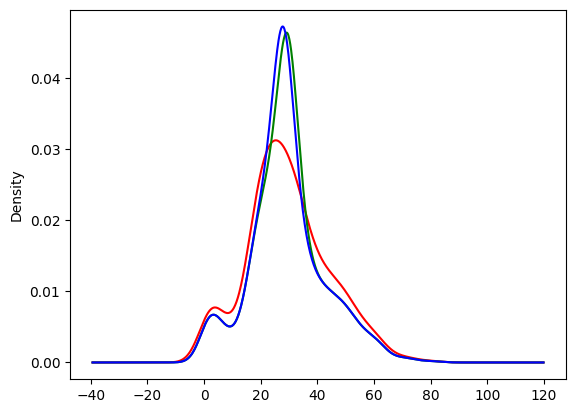

In [115]:
# Seeing the plots.
# Original plot:
X_train['Age'].plot(kind='kde', color='red')
X_train['Age_mean'].plot(kind='kde', color='green')
X_train['Age_median'].plot(kind='kde',color='blue')

In [116]:
# we see that there has been some major change in the distribution.

<Axes: ylabel='Density'>

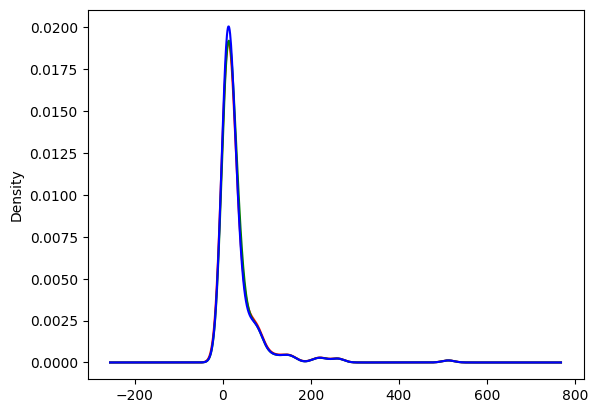

In [117]:
# For fare.
X_train['Fare'].plot(kind='kde', color='red')
X_train['Fare_mean'].plot(kind='kde', color='green')
X_train['Fare_median'].plot(kind='kde',color='blue')

In [118]:
# NO change, so imputation was good.

In [119]:
# Finally checking the covariance, and correlation.
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.193767,70.082085
Fare,75.481375,2761.031435,18.599163,60.224654,63.938058,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,-5.587710,17.657433,17.672035
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,57.175304,56.282518
Age_median,210.251707,63.938058,-5.587710,168.851934,169.207310,60.700688,59.728510
Fare_mean,71.193767,2761.031435,17.657433,57.175304,60.700688,2621.232375,2621.232375
Fare_median,70.082085,2761.031435,17.672035,56.282518,59.728510,2621.232375,2637.012482


In [120]:
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088944,0.087232
Fare,0.091482,1.000000,0.207193,0.088151,0.093496,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.256883,-0.255307,0.204981,0.204536
Age_mean,1.000000,0.088151,-0.256883,1.000000,0.998949,0.085941,0.084346
Age_median,1.000000,0.093496,-0.255307,0.998949,1.000000,0.091145,0.089416
Fare_mean,0.088944,1.000000,0.204981,0.085941,0.091145,1.000000,0.997003
Fare_median,0.087232,1.000000,0.204536,0.084346,0.089416,0.997003,1.000000


<Axes: >

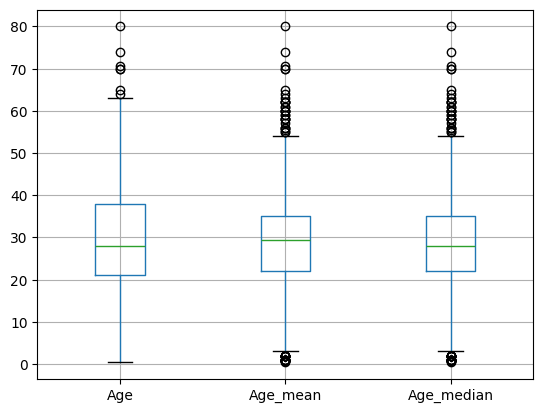

In [124]:
# Box plot
X_train[['Age', 'Age_mean', 'Age_median']].boxplot()

In [125]:
# we see that the outliers increased after mean imputation.

<Axes: >

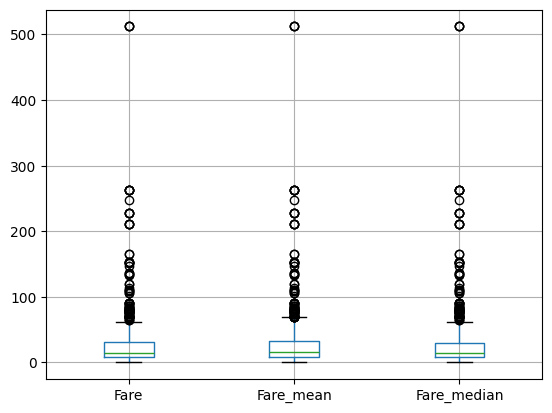

In [126]:
X_train[['Fare','Fare_mean','Fare_median']].boxplot()

In [127]:
# no change in fare

In [128]:
# We replace with mean,median when it is the case of missing completely at random.

# Random Imputation

In [129]:
# replace null values with random no taken from the existing data.
# it can be applied on both numerical, categorical:
# data distribution remain intact.

### Good with linear models.
### Not with the tree based.

## 2. Multivariate imputation

In [132]:
## 1 KNN imputation:= works for knn algorithm.
